# **Bioinformatics Project - Computational Drug Discovery [Part 2] Exploratory Data Analysis**

In **Part 2**, we will be performing Descriptor Calculation and Exploratory Data Analysis.

---

## **Install conda and rdkit**

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-02-16 00:40:59--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  69.4MB/s    in 1.2s    

2025-02-16 00:41:01 (69.4 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0

## **Load bioactivity data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
!find /content/drive/MyDrive -type f -name "bioactivity_preprocessed_data.csv"


/content/drive/MyDrive/Colab Notebooks/data/bioactivity_preprocessed_data.csv


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,5470.0,intermediate
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,1360.0,intermediate
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,30800.0,inactive
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,22500.0,inactive
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,180.0,active
...,...,...,...,...
3557,CHEMBL5398630,O=C(O)/C=C/C(=O)O.[2H]C([2H])(Cc1c[nH]c2ccccc1...,1500.0,intermediate
3558,CHEMBL3183055,CN(C)CCc1c[nH]c2ccccc12.O=C(O)/C=C/C(=O)O,1180.0,intermediate
3559,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,37756.0,inactive
3560,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,25431.0,inactive


Canonical SMILES tutorial: https://luis-vollmers.medium.com/tutorial-to-smiles-and-canonical-smiles-explained-with-examples-fbc8a46ca29f

## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

### **Import libraries**

In [ ]:
!pip install numpy
!pip install rdkit
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


### **Calculate descriptors**

Although SMILES strings are not the most reliable molecule identifers, for the sake of simplicity of this project, we stick to SMILES format.

In [ ]:

def lipinski(smiles, verbose=True): #verbose=True to print message about invalid SMILES strings.
    # Initialize an empty list to store molecular descriptors
    descriptors_list = []

    # Loop through each SMILES string
    for smile in smiles:
        mol = Chem.MolFromSmiles(smile) #Construct a molecule from a SMILES string.

        if mol is not None:  # Check if the molecule is valid
            # Calculate descriptors
            desc_MolWt = Descriptors.MolWt(mol) #The average molecular weight of the molecule
            desc_MolLogP = Descriptors.MolLogP(mol) # Atom-based calculation of LogP
            desc_NumHDonors = Lipinski.NumHDonors(mol) #Number of Hydrogen Bond Donors
            desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #Number of Hydrogen Bond Acceptors

            # Append the descriptors as a list
            descriptors_list.append([desc_MolWt, desc_MolLogP, desc_NumHDonors, desc_NumHAcceptors])
        else: # if mol is none (SMILES is invalid, cannot be converted)
            if verbose: # check if verbose is set to True
                print(f"Invalid SMILES: {smile}")

    # Create a DataFrame from the list of descriptors
    column_names = ["MW", "LogP", "NumHDonors", "NumHAcceptors"]
    descriptors_df = pd.DataFrame(descriptors_list, columns=column_names)

    return descriptors_df

In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,426.314000,4.5945,1,4
1,305.765000,2.9150,1,4
2,226.323000,3.3220,0,2
3,305.765000,2.9150,1,4
4,310.191000,3.6709,1,3
...,...,...,...,...
3557,306.358204,1.9838,3,3
3558,304.346000,1.9838,3,3
3559,416.135000,6.4548,0,3
3560,344.845000,5.3767,0,2


### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [ ]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,426.314000,4.5945,1,4
1,305.765000,2.9150,1,4
2,226.323000,3.3220,0,2
3,305.765000,2.9150,1,4
4,310.191000,3.6709,1,3
...,...,...,...,...
3557,306.358204,1.9838,3,3
3558,304.346000,1.9838,3,3
3559,416.135000,6.4548,0,3
3560,344.845000,5.3767,0,2


In [ ]:
df.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class'],
      dtype='object')

Now, let's combine the 2 DataFrame

In [ ]:
df_combined = pd.concat([df,df_lipinski], axis=1)

In [ ]:
df_combined.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')

In [ ]:
print(df_combined.columns)


Index(['molecule_chembl_id', 'canonical_smiles', 'standard_value',
       'bioactivity_class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

The greater pIC50 is, the more potent the drug is.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50 #add the calculated pIC50 values as a new column to the DataFrame input.

    #input.drop('standard_value', axis=1, inplace=True) # # Use inplace=True to drop the column in place
    return input

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.

In [ ]:
df_combined.standard_value.describe()

,standard_value
count,3.562000e+03
mean,5.191194e+04
std,2.173863e+05
min,1.000000e-01
25%,2.332500e+03
50%,1.231000e+04
75%,5.996750e+04
max,8.637000e+06


In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )
#this happens when the standard norm is greater 100,000,000. The pIC50 becomes negative

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000 # cap the value = 100,000,000
        norm.append(i)

    input['standard_value_norm'] = norm
    input.drop('standard_value', axis=1, inplace=True)

    return input

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL156630,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NCc3ccccc3)c(Br)c21,intermediate,426.314000,4.5945,1,4,5470.0
1,CHEMBL155754,C/N=C1/CCc2c1n(C)c1ccc(OC(=O)NC)c(Cl)c21,intermediate,305.765000,2.9150,1,4,1360.0
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,inactive,226.323000,3.3220,0,2,30800.0
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,inactive,305.765000,2.9150,1,4,22500.0
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,active,310.191000,3.6709,1,3,180.0
...,...,...,...,...,...,...,...,...
3557,CHEMBL5398630,O=C(O)/C=C/C(=O)O.[2H]C([2H])(Cc1c[nH]c2ccccc1...,intermediate,306.358204,1.9838,3,3,1500.0
3558,CHEMBL3183055,CN(C)CCc1c[nH]c2ccccc12.O=C(O)/C=C/C(=O)O,intermediate,304.346000,1.9838,3,3,1180.0
3559,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,inactive,416.135000,6.4548,0,3,37756.0
3560,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,inactive,344.845000,5.3767,0,2,25431.0


In [ ]:
df_norm.standard_value_norm.describe() #check for the max value

,standard_value_norm
count,3.562000e+03
mean,5.191194e+04
std,2.173863e+05
min,1.000000e-01
25%,2.332500e+03
50%,1.231000e+04
75%,5.996750e+04
max,8.637000e+06


In [ ]:
df_final = pIC50(df_norm)
df_final.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors', 'standard_value_norm', 'pIC50'],
      dtype='object')

In [ ]:
df_final.pIC50.describe()

,pIC50
count,3562.000000
mean,5.064774
std,1.101818
min,2.063637
25%,4.222084
50%,4.909742
75%,5.632179
max,10.000000


Let's write this to CSV file.

In [ ]:
df_final.to_csv('bioactivity_preprocessed_pIC50.csv')

In [ ]:
! cp bioactivity_preprocessed_pIC50.csv "/content/drive/My Drive/Colab Notebooks/data"

In [ ]:
! ls "/content/drive/My Drive/Colab Notebooks/data"

bioactivity_data.csv  bioactivity_preprocessed_data.csv  bioactivity_preprocessed_pIC50.csv


### **Removing the 'intermediate' bioactivity class**

Here, we will be removing the ``intermediate`` class from our data set.

In [ ]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm,pIC50
2,CHEMBL348083,CC(C)/N=C1/CCc2c1n(C)c1ccccc21,inactive,226.323,3.3220,0,2,30800.0,4.511449
3,CHEMBL157182,C/N=C1/CCc2c1n(C)c1cc(Cl)c(OC(=O)NC)cc21,inactive,305.765,2.9150,1,4,22500.0,4.647817
4,CHEMBL160347,COc1cc(Br)c2oc(C3CCNCC3)cc2c1,active,310.191,3.6709,1,3,180.0,6.744727
6,CHEMBL160219,CNC(=O)Oc1ccc2c(c1)c1c(n2C)/C(=N\CCc2ccccc2)CC1,inactive,361.445,3.8745,1,4,1000000.0,3.000000
7,CHEMBL445916,CCCn1c2c(c3c(Br)c(OC(=O)NC)ccc31)CC/C2=N/CC,inactive,392.297,4.2872,1,4,1000000.0,3.000000
...,...,...,...,...,...,...,...,...,...
3555,CHEMBL2262973,CC(C)(C)c1ccc(S(=O)(=O)N2CCN(C(c3ccccc3)c3cccc...,active,448.632,5.0800,0,3,120.0,6.920819
3556,CHEMBL5402518,O=[N+]([O-])c1cccc2cc(-c3ccccc3)oc12,active,239.230,4.0080,0,3,168.0,6.774691
3559,CHEMBL91,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1,inactive,416.135,6.4548,0,3,37756.0,4.423014
3560,CHEMBL104,Clc1ccccc1C(c1ccccc1)(c1ccccc1)n1ccnc1,inactive,344.845,5.3767,0,2,25431.0,4.594637


Let's write this to CSV file.

In [ ]:
df_2class.to_csv('bioactivity_preprocessed_2class_pIC50.csv')

---

## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

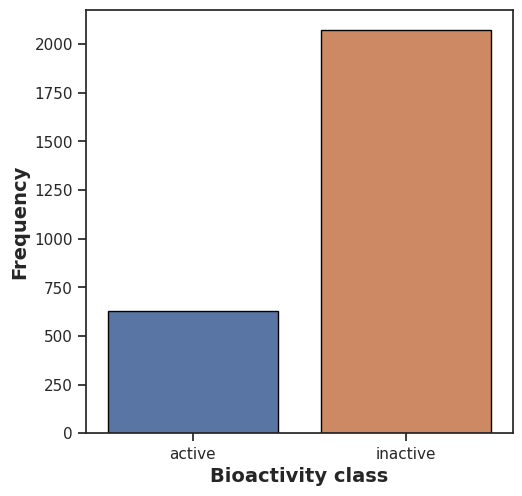

In [ ]:
plt.figure(figsize=(5.5, 5.5))

# Create a copy of the DataFrame and set the 'bioactivity_class' column as categorical
df_2class_copy = df_2class.copy()
df_2class_copy['bioactivity_class'] = df_2class_copy['bioactivity_class'].astype('category')

sns.countplot(x='bioactivity_class', data=df_2class_copy, edgecolor='black', hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

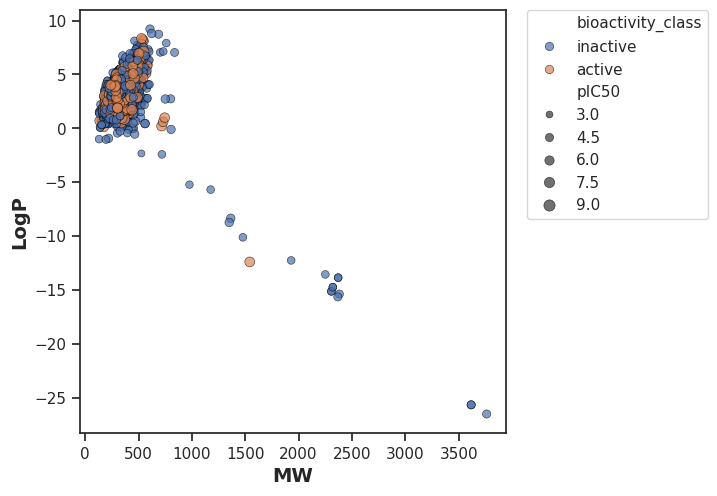

In [ ]:
plt.figure(figsize=(5.5, 5.5))

# Assuming df_2class['pIC50'] is numeric (float), you can cast it to float
df_2class.loc[:, 'pIC50'] = df_2class['pIC50'].astype(float)

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

A scatter plot of MW as a function of LogP is shown above, suggesting that the MW clusters in the range 200–600 Da, and the LogP ranges from 0 to 8.

### **Box plots**

#### **pIC50 value**

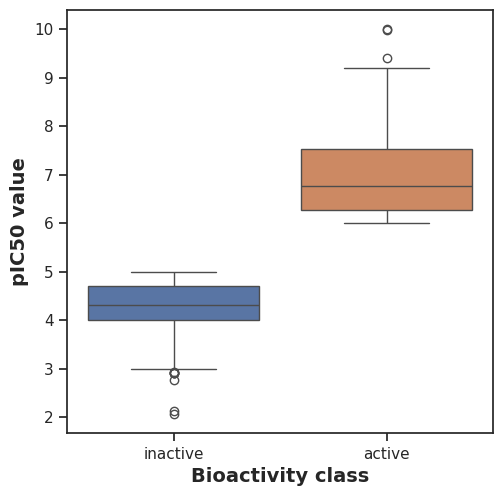

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x='bioactivity_class', y='pIC50', data=df_2class, hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
def mannwhitney(descriptor, verbose=False): #look at the distributions of the two bioactivity class

  from scipy.stats import mannwhitneyu


# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]  #only look at a specific type of descriptor of active compounds

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)  #assess U statistic and p-value
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation},index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,1305360.0,0.0,0.05,Different distribution (reject H0)


#### **MW**

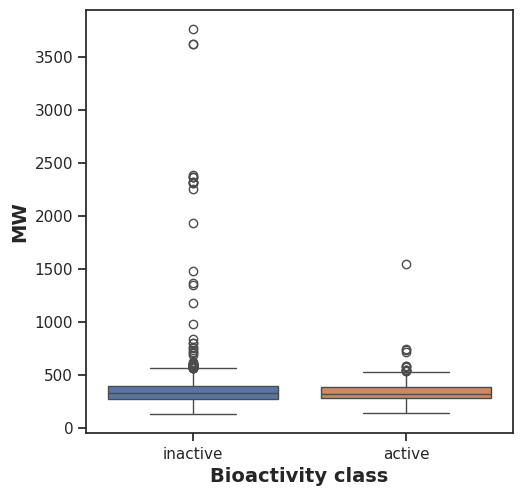

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class, hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,644500.0,0.633354,0.05,Same distribution (fail to reject H0)


#### **LogP**

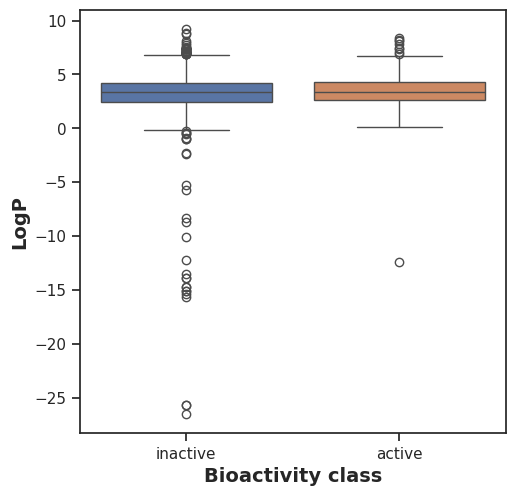

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class, hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,670177.5,0.307544,0.05,Same distribution (fail to reject H0)


#### **NumHDonors**

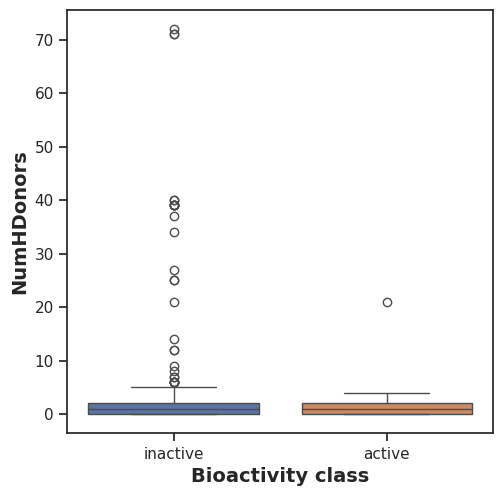

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class, hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,610277.5,0.008803,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

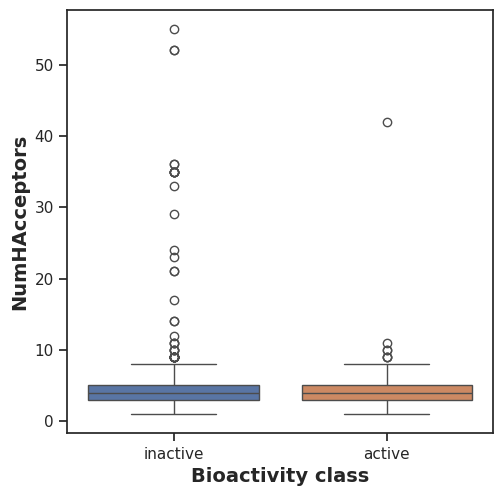

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class, hue='bioactivity_class', palette='deep', legend=False)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,642914.5,0.563185,0.05,Same distribution (fail to reject H0)


#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

**Molecular weight MW**: active and inactive drugs have similar MW distributions.

**LogP (lipophilicity)**: Both groups have similar logP distributions, meaning their lipophilicity characteristics are not significantly different. <br /> **Number of Hydrogen Donors (NumHDonors)**: Active and inactive drugs do have significantly different distributions for hydrogen donors, suggesting this property plays a role in distinguishing active drugs from inactive ones. <br /> **Number of Hydrogen Acceptors (NumHAcceptors):**  The distributions are similar, meaning this feature does not significantly differentiate active and inactive drugs.

## **Zip files**

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

	zip warning: name not matched: drive/MyDrive/Class Activity #3_FA23_ANSWER KEY.pdf
Scanning files 
  adding: bioactivity_preprocessed_2class_pIC50.csv (deflated 75%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: bioactivity_preprocessed_pIC50.csv (deflated 75%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 12%)
  adding: plot_NumHDonors.pdf (deflated 37%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_MW.pdf (deflated 38%)
